In [107]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from pandas import to_datetime
from prophet import Prophet
import fbprophet

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# **Importing the data set:-**

In [74]:
dset = pd.read_csv(r'C:\Users\HP\Desktop\Intro to DL\DailyDelhiClimate.csv')
dset = dset[['date', 'meanpressure']].copy().dropna()
dset.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [75]:
dset.columns=["ds","y"]

In [76]:
dset = dset.replace(',','', regex=True)

# **Converting dataset to numeric :-**

In [77]:
pd.to_numeric(dset['y'])

0       1015.666667
1       1017.800000
2       1018.666667
3       1017.166667
4       1016.500000
           ...     
1457    1015.565217
1458    1016.904762
1459    1017.904762
1460    1016.100000
1461    1016.000000
Name: y, Length: 1462, dtype: float64

In [78]:
dset['ds']= to_datetime(dset['ds'])

In [79]:
dset.head()

,ds,y
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [80]:
from fbprophet import Prophet
model = Prophet()

# **Fitting the model in dataset:-**

In [81]:
model.fit(dset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
model

In [83]:
future = model.make_future_dataframe(periods =365)

# **Prediction of the Model:-**

In [84]:
pred=model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1005.027650,751.574942,1218.768799,1005.027650,1005.027650,-1.891881,-1.891881,-1.891881,-10.902243,-10.902243,-10.902243,9.010362,9.010362,9.010362,0.0,0.0,0.0,1003.135769
1,2013-01-02,1005.032736,779.108819,1224.071810,1005.032736,1005.032736,6.682469,6.682469,6.682469,-2.870940,-2.870940,-2.870940,9.553409,9.553409,9.553409,0.0,0.0,0.0,1011.715205
2,2013-01-03,1005.037822,777.573197,1237.591020,1005.037822,1005.037822,8.521364,8.521364,8.521364,-1.555378,-1.555378,-1.555378,10.076742,10.076742,10.076742,0.0,0.0,0.0,1013.559186
3,2013-01-04,1005.042908,755.452526,1234.775577,1005.042908,1005.042908,7.508381,7.508381,7.508381,-3.051588,-3.051588,-3.051588,10.559969,10.559969,10.559969,0.0,0.0,0.0,1012.551289
4,2013-01-05,1005.047994,793.088466,1244.356600,1005.047994,1005.047994,9.587361,9.587361,9.587361,-1.395155,-1.395155,-1.395155,10.982516,10.982516,10.982516,0.0,0.0,0.0,1014.635355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2017-12-28,965.199818,746.133928,1209.996807,957.969345,971.917130,5.341266,5.341266,5.341266,-1.555378,-1.555378,-1.555378,6.896644,6.896644,6.896644,0.0,0.0,0.0,970.541084
1823,2017-12-29,965.105047,731.768990,1192.797900,957.833552,971.890975,4.279865,4.279865,4.279865,-3.051588,-3.051588,-3.051588,7.331454,7.331454,7.331454,0.0,0.0,0.0,969.384912
1824,2017-12-30,965.010276,763.358059,1207.644710,957.697760,971.864820,6.419083,6.419083,6.419083,-1.395155,-1.395155,-1.395155,7.814237,7.814237,7.814237,0.0,0.0,0.0,971.429359
1825,2017-12-31,964.915506,732.598466,1189.573743,957.561968,971.819083,3.568639,3.568639,3.568639,-4.764629,-4.764629,-4.764629,8.333269,8.333269,8.333269,0.0,0.0,0.0,968.484145


# **Preparing Data for Training:-**

In [85]:
# Determining time series
dset['ds'] = pd.to_datetime(dset['ds'], dayfirst=True)
# dset.columns = ['y', 'ds']

dset['month'], dset['year'] = dset['ds'].dt.month, dset['ds'].dt.year
dset.head()

data = dset[['ds', 'y']].copy().dropna()
data.columns = ['ds', 'y']
# data = data[(data.y != 0).any()]

daily_dset = data.groupby(pd.PeriodIndex(data['ds'], freq='D'))['y'].mean().to_timestamp().reset_index()
daily_dset.head()
# daily_dset.dtypes





,ds,y
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [86]:
monthly_dset = data.groupby(pd.PeriodIndex(data['ds'], freq='M'))['y'].mean().to_timestamp().reset_index()
monthly_dset.head()
# monthly_dset.dtypes

,ds,y
0,2013-01-01,1017.847734
1,2013-02-01,1015.946003
2,2013-03-01,1011.733909
3,2013-04-01,1006.292341
4,2013-05-01,999.924194


In [87]:
annual_dset = data.groupby(pd.PeriodIndex(data['ds'], freq='Y'))['y'].mean().to_timestamp().reset_index()
annual_dset.head()
# annual_dset.dtypes

,ds,y
0,2013-01-01,1007.642172
1,2014-01-01,1008.347166
2,2015-01-01,1008.834821
3,2016-01-01,1019.557460
4,2017-01-01,1016.000000


# **Training the models and evaluating forecasts:-**

In [88]:
def train_model(growth, seasonality, dset):
    model = None

    if seasonality == 'daily':
        model = Prophet(growth=growth, changepoint_prior_scale=30, n_changepoints=30, daily_seasonality=False)
        model.add_seasonality('daily', period=1, fourier_order=15)
        model.fit(dset)

    elif seasonality == 'monthly':
        model = Prophet(growth=growth, changepoint_prior_scale=15, n_changepoints=3, weekly_seasonality=False)
        model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        model.fit(dset)

    elif seasonality == 'annual':
        model = Prophet(growth=growth, changepoint_prior_scale=15, n_changepoints=3, yearly_seasonality=False)
        model.add_seasonality(name='yearly', period=365, fourier_order=15)
        model.fit(dset)      

    return model



# **Forecasting:-**

In [108]:
def get_forecast(model, time_period):
    future_df = model.make_future_dataframe(periods=time_period)
    forecast = model.predict(future_df)
    return future_df, forecast


def evaluate_forecast(forecast, actual, time_period):
    y_true = actual
    y_pred = forecast[:(len(forecast)-time_period)]

    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    reg_score = r2_score(y_true, y_pred)    

    print("Regression Score :", reg_score)
    print("Mean Absolute Error :", mae)
    print("Mean Absolute Percentage Error :", mape)

    plt.plot(y_pred, c='orange', label='Predicted')
    plt.plot(y_true, c='blue', label='Actual')
    plt.legend(loc='lower right')
    plt.show()



def plot_graph(data, label):
    plt.plot(data, c='green', label=label)
    plt.legend(loc='lower right')
    plt.show()

# **Daily Consumption Forecast:-** 

In [90]:
dset_daily = pd.DataFrame(daily_dset)
dset_daily.dtypes
model_daily = train_model(growth='linear', seasonality='daily', dset=dset_daily)
future_daily, forecast_daily = get_forecast(model=model_daily, time_period=365)

forecast_daily.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1005.951140,798.118848,1236.168836,1005.951140,1005.951140,14.097008,14.097008,14.097008,-13.852168,...,-10.944015,-10.944015,-10.944015,38.893191,38.893191,38.893191,0.0,0.0,0.0,1020.048148
1,2013-01-02,1005.672335,805.797019,1257.692968,1005.672335,1005.672335,22.297294,22.297294,22.297294,-13.852168,...,-2.889789,-2.889789,-2.889789,39.039251,39.039251,39.039251,0.0,0.0,0.0,1027.969629
2,2013-01-03,1005.393531,794.615616,1265.463242,1005.393531,1005.393531,23.747909,23.747909,23.747909,-13.852168,...,-1.565099,-1.565099,-1.565099,39.165176,39.165176,39.165176,0.0,0.0,0.0,1029.141439
3,2013-01-04,1005.114727,789.050081,1256.444989,1005.114727,1005.114727,22.351043,22.351043,22.351043,-13.852168,...,-3.052428,-3.052428,-3.052428,39.255639,39.255639,39.255639,0.0,0.0,0.0,1027.465770
4,2013-01-05,1004.835922,812.296340,1256.972566,1004.835922,1004.835922,24.068592,24.068592,24.068592,-13.852168,...,-1.374231,-1.374231,-1.374231,39.294991,39.294991,39.294991,0.0,0.0,0.0,1028.904514


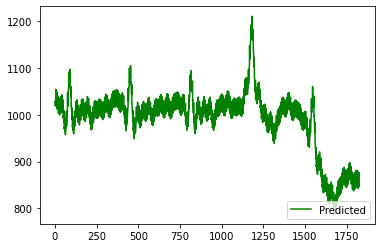

In [91]:
plot_graph(forecast_daily['yhat'], 'Predicted')

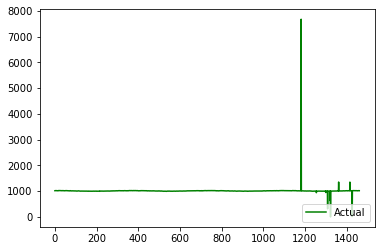

In [92]:
plot_graph(dset_daily['y'], 'Actual')

Regression Score : 0.03336698227535728
Mean Absolute Error : 25.879182041717122
Mean Absolute Percentage Error : 0.29291980337630924


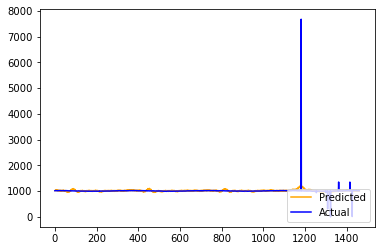

In [109]:
evaluate_forecast(forecast_daily['yhat'], dset_daily['y'], 365)

In [ ]:
model_daily.plot_components(forecast_daily)

# **Monthly Forecasting:-**

In [101]:
model_monthly = train_model(growth='linear', seasonality='monthly', dset=monthly_dset)
future_monthly, forecast_monthly = get_forecast(model=model_monthly, time_period=1)

forecast_monthly.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1755.438227,1005.465286,1047.188370,1755.438227,1755.438227,-728.914503,-728.914503,-728.914503,-684.617753,-684.617753,-684.617753,-44.296750,-44.296750,-44.296750,0.0,0.0,0.0,1026.523724
1,2013-02-01,1760.568177,992.430531,1034.448184,1760.568177,1760.568177,-746.770542,-746.770542,-746.770542,-608.716113,-608.716113,-608.716113,-138.054429,-138.054429,-138.054429,0.0,0.0,0.0,1013.797635
2,2013-03-01,1765.201680,1039.060113,1080.816339,1765.201680,1765.201680,-704.917880,-704.917880,-704.917880,-787.925416,-787.925416,-787.925416,83.007536,83.007536,83.007536,0.0,0.0,0.0,1060.283800
3,2013-04-01,1770.331629,965.319050,1007.805207,1770.331629,1770.331629,-784.590555,-784.590555,-784.590555,-766.690345,-766.690345,-766.690345,-17.900209,-17.900209,-17.900209,0.0,0.0,0.0,985.741075
4,2013-05-01,1775.296097,953.760911,995.090799,1775.296097,1775.296097,-800.940323,-800.940323,-800.940323,-787.925416,-787.925416,-787.925416,-13.014907,-13.014907,-13.014907,0.0,0.0,0.0,974.355774


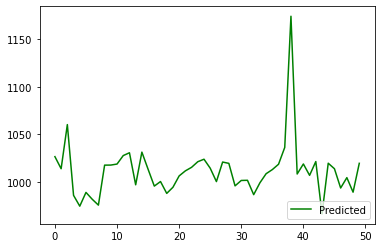

In [102]:
plot_graph(forecast_monthly['yhat'], 'Predicted')

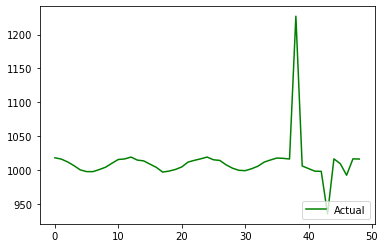

In [103]:
plot_graph( monthly_dset['y'], 'Actual')

Regression Score : 0.763309327507259
Mean Absolute Error : 11.897904531813758
Mean Absolute Percentage Error : 0.01166397433107374


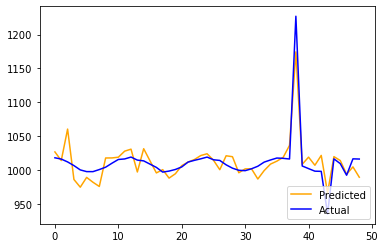

In [110]:
evaluate_forecast(forecast_monthly['yhat'], monthly_dset['y'], 1)

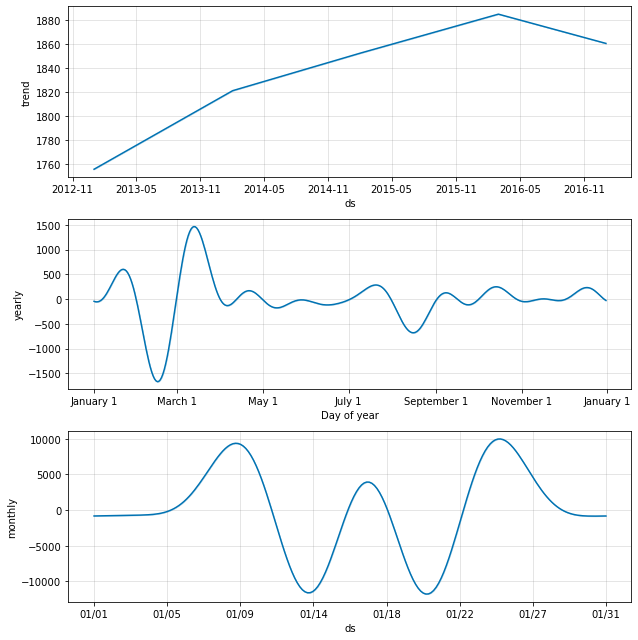

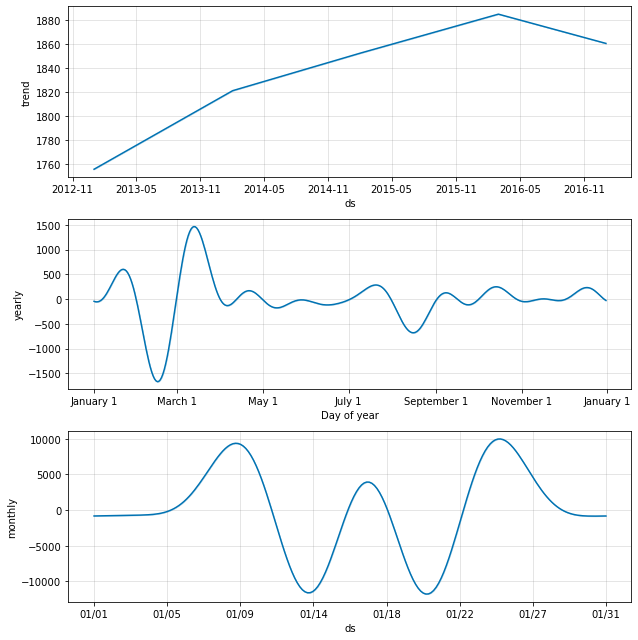

In [105]:
model_monthly.plot_components(forecast_monthly)

# **Annual Forecasting:-**

In [97]:
model_annual= train_model(growth='linear', seasonality='annual', dset=annual_dset)
future_annual, forecast_annual = get_forecast(model=model_annual, time_period=10)

forecast_annual.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,266.076118,1007.642172,1007.642172,266.076118,266.076118,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1007.642172
1,2014-01-01,266.781111,1008.347166,1008.347166,266.781111,266.781111,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1008.347166
2,2015-01-01,267.268767,1008.834821,1008.834821,267.268767,267.268767,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1008.834821
3,2016-01-01,277.991405,1019.557460,1019.557460,277.991405,277.991405,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1019.557460
4,2017-01-01,297.390740,1016.000000,1016.000000,297.390740,297.390740,718.609260,718.609260,718.609260,718.609260,718.609260,718.609260,0.0,0.0,0.0,1016.000000


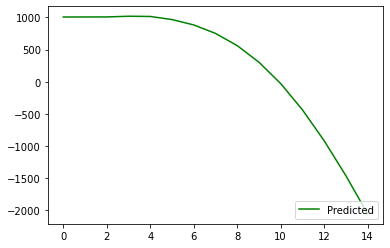

In [98]:
plot_graph(forecast_annual['yhat'], 'Predicted')

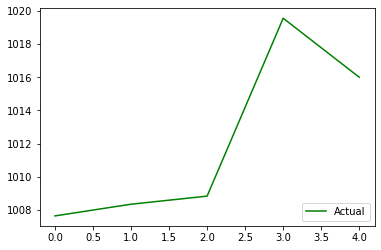

In [99]:
plot_graph(annual_dset['y'], 'Actual')

Regression Score : 1.0
Mean Absolute Error : 1.0868461686186492e-10
Mean Absolute Percentage Error : 1.0724105711620151e-13


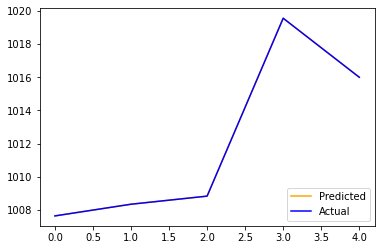

In [111]:
evaluate_forecast(forecast_annual['yhat'], annual_dset['y'], 10)

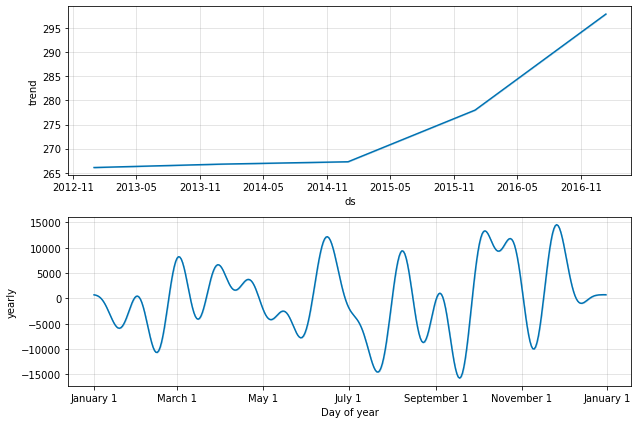

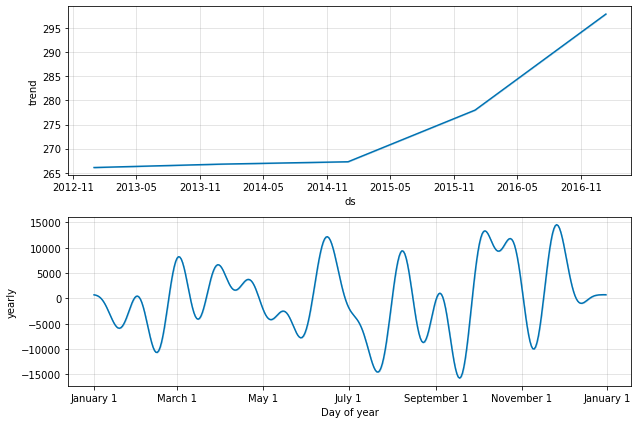

In [112]:
model_annual.plot_components(forecast_annual)